In [ ]:
#Etape 4
import plotly.graph_objects as go

data['Date'] = pd.to_datetime(data['Date'])
data['Year_Month'] = data['Date'].dt.to_period('M')

monthly_data = data.groupby('Year_Month').agg({'Temperature': 'mean', 'Precipitation': 'sum'}).reset_index()

temperature_trace = go.Scatter(
    x=monthly_data['Year_Month'].astype(str),
    y=monthly_data['Temperature'],
    mode='lines+markers',
    name='Température Moyenne',
    line=dict(color='orange')
)
precipitation_trace = go.Bar(
    x=monthly_data['Year_Month'].astype(str),
    y=monthly_data['Precipitation'],
    name='Précipitations Totales',
    marker=dict(color='blue')
)


layout = go.Layout(
    title='Tableau de Bord Température et Précipitations',
    xaxis_title='Mois',
    yaxis_title='Valeur',
    template='plotly_dark',
    barmode='group'
)


fig = go.Figure(data=[temperature_trace, precipitation_trace], layout=layout)

fig.show()

# Répondre aux questions intermédiaires :

# Question 1 : Quels mois présentent à la fois des températures élevées et de fortes précipitations ?
threshold_temp = 30  # Température élevée (par exemple, plus de 30°C)
threshold_precip = 0.3  # Forte précipitation (par exemple, plus de 0.3 mm)

# Identifier les mois avec des températures élevées et des précipitations fortes
high_temp_and_high_precip = monthly_data[(monthly_data['Temperature'] >= threshold_temp) & 
                                          (monthly_data['Precipitation'] >= threshold_precip)]

print("\nMois avec des températures élevées et de fortes précipitations :")
print(high_temp_and_high_precip)

# Question 2 : Les mois les plus secs sont-ils aussi les plus froids ?
# Identifier les mois les plus secs (précipitations faibles)
dry_months = monthly_data[monthly_data['Precipitation'] == monthly_data['Precipitation'].min()]

print("\nMois les plus secs (précipitations faibles) :")
print(dry_months)

# Identifier les mois les plus froids (température faible)
cold_months = monthly_data[monthly_data['Temperature'] == monthly_data['Temperature'].min()]

print("\nMois les plus froids (température faible) :")
print(cold_months)


Mois avec des températures élevées et de fortes précipitations :
Empty DataFrame
Columns: [Year_Month, Temperature, Precipitation]
Index: []

Mois les plus secs (précipitations faibles) :
  Year_Month  Temperature  Precipitation
1    2023-02    20.640625             95

Mois les plus froids (température faible) :
  Year_Month  Temperature  Precipitation
8    2023-09    -4.568056            125


/var/folders/pq/nt06f9v13f3_szjf6s_hw5p40000gn/T/ipykernel_87837/1469425299.py:29: UserWarning: Mismatched number of handles and labels: len(handles) = 1 len(labels) = 2
  plt.legend(handles=[bar], labels=["Forte Précipitation", "Faible Précipitation"], loc="upper right")


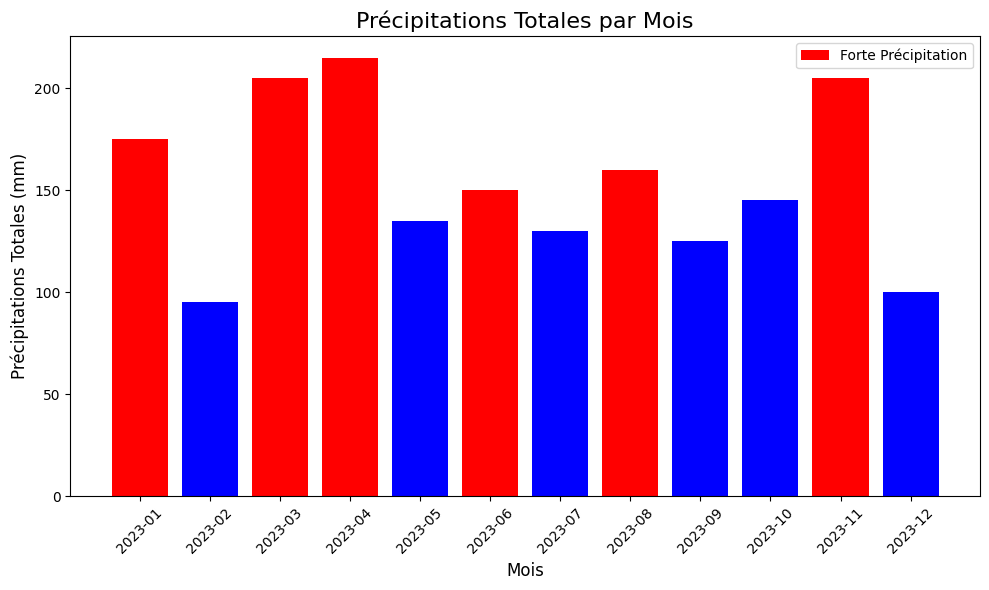


Mois avec les précipitations les plus élevées : Year_Month             2023-04
Precipitation              215
Precipitation_Level       High
Name: 3, dtype: object


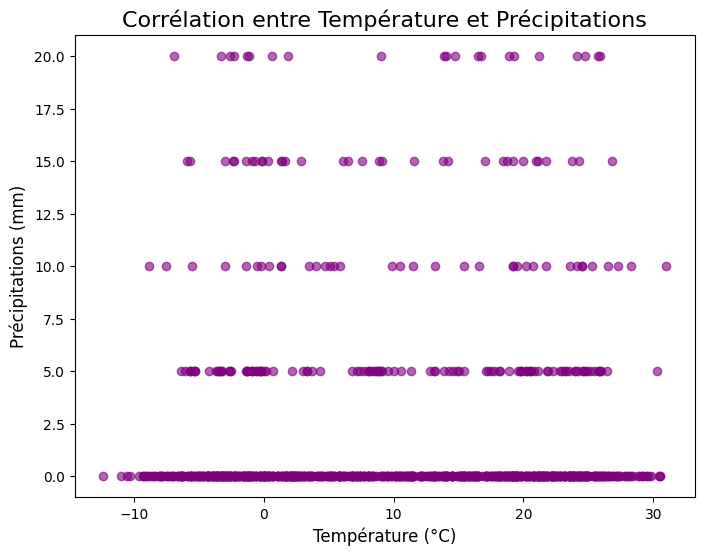

In [ ]:
#Etape 3
import numpy as np

data['Date'] = pd.to_datetime(data['Date'])

data['Year_Month'] = data['Date'].dt.to_period('M')

s
grouped_data = data.groupby('Year_Month')['Precipitation'].sum().reset_index()

seuil = grouped_data['Precipitation'].median() 

# Ajouter une colonne 'High Precipitation' pour colorier les barres
grouped_data['Precipitation_Level'] = np.where(grouped_data['Precipitation'] >= seuil, 'High', 'Low')


plt.figure(figsize=(10, 6))
bar = plt.bar(grouped_data['Year_Month'].astype(str), grouped_data['Precipitation'], color=grouped_data['Precipitation_Level'].map({'High': 'red', 'Low': 'blue'}))


plt.title("Précipitations Totales par Mois", fontsize=16)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Précipitations Totales (mm)", fontsize=12)
plt.xticks(rotation=45)


plt.legend(handles=[bar], labels=["Forte Précipitation", "Faible Précipitation"], loc="upper right")


plt.tight_layout()
plt.show()

# Question 1 : Quels mois ont les précipitations les plus importantes ?
mois_precip_max = grouped_data.loc[grouped_data['Precipitation'].idxmax()]
print("\nMois avec les précipitations les plus élevées :", mois_precip_max)

# Question 2 : Observez-vous une corrélation entre précipitations et température ?
# Pour observer visuellement la corrélation, nous pouvons afficher un nuage de points.
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['Precipitation'], color='purple', alpha=0.6)
plt.title("Corrélation entre Température et Précipitations", fontsize=16)
plt.xlabel("Température (°C)", fontsize=12)
plt.ylabel("Précipitations (mm)", fontsize=12)
plt.show()

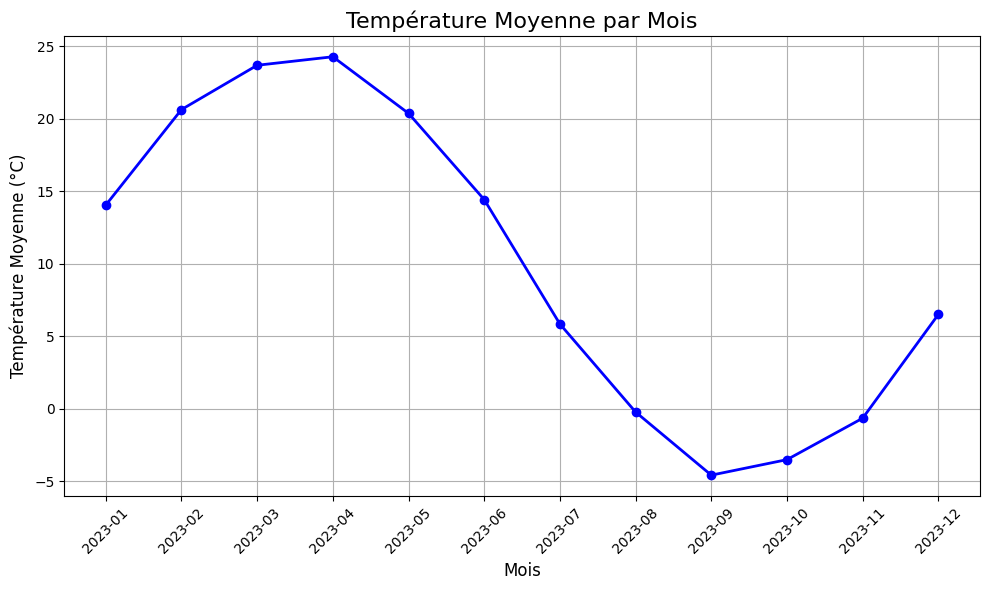


Mois avec la température la plus élevée : Year_Month         2023-04
Temperature      24.282105
Precipitation          215
Humidity         69.763158
Name: 3, dtype: object


In [ ]:
#Etape 2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year_Month'].astype(str), grouped_data['Temperature'], marker='o', color='b', linestyle='-', linewidth=2)

plt.title("Température Moyenne par Mois", fontsize=16)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Température Moyenne (°C)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()

# Question 1 : Pendant quels mois la température est-elle la plus élevée ?
mois_temp_max = grouped_data.loc[grouped_data['Temperature'].idxmax()]
print("\nMois avec la température la plus élevée :", mois_temp_max)

In [ ]:
#Etape 1
import pandas as pd
data = pd.read_csv("data.csv")
data['Date'] = pd.to_datetime(data['Date'])

data['Year_Month'] = data['Date'].dt.to_period('M')


grouped_data = data.groupby('Year_Month').agg({
    'Temperature': 'mean',
    'Precipitation': 'sum',
    'Humidity': 'mean'
}).reset_index()


print(grouped_data)

# Question 1 : Quels sont les mois avec les précipitations les plus élevées ?
mois_precipitations_max = grouped_data.loc[grouped_data['Precipitation'].idxmax()]
print("\nMois avec les précipitations les plus élevées :", mois_precipitations_max)

# Question 2 : Y a-t-il une différence notable entre les mois en termes d'humidité ?
mois_max_humidite = grouped_data.loc[grouped_data['Humidity'].idxmax()]
mois_min_humidite = grouped_data.loc[grouped_data['Humidity'].idxmin()]

print("\nMois avec l'humidité la plus élevée :", mois_max_humidite)
print("Mois avec l'humidité la plus faible :", mois_min_humidite)

   Year_Month  Temperature  Precipitation   Humidity
0     2023-01    14.053333            175  55.294286
1     2023-02    20.640625             95  64.035938
2     2023-03    23.695349            205  69.829070
3     2023-04    24.282105            215  69.763158
4     2023-05    20.378667            135  66.606667
5     2023-06    14.431765            150  55.181176
6     2023-07     5.852941            130  44.412941
7     2023-08    -0.216092            160  36.750575
8     2023-09    -4.568056            125  33.256944
9     2023-10    -3.497849            145  34.561290
10    2023-11    -0.640000            205  38.417647
11    2023-12     6.514706            100  45.213235

Mois avec les précipitations les plus élevées : Year_Month         2023-04
Temperature      24.282105
Precipitation          215
Humidity         69.763158
Name: 3, dtype: object

Mois avec l'humidité la plus élevée : Year_Month         2023-03
Temperature      23.695349
Precipitation          205
Humidity   